<a href="https://colab.research.google.com/github/swapnil2009/PyCBC/blob/master/Cpastone_Project_1_Swapnil_Tripathi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Magnimind Academy Fullstack Data Science Career Track Data Exploration Capstone Project 

## Objectives
Hi All! You are learning a lot in a short span of time. It is now the time to test your data exploration skills with this capstone!

In this notebook, you're going to apply the skills you've been learning, bridging the gap towards the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***In this notebook, we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to ask for help; the more independent work you do, the better it is for your learning!***

This challenge will make use of Data Exploration with Python skills. 



## The Data Science Pipeline

When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 


#### 1.1. Importing Libraries

In [61]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the pyplot collection of functions from matplotlib, as plt 
from datetime import datetime as dt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [62]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices= "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  

df = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 


**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [63]:
df.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            326 non-null    datetime64[ns]
 1   City of London        327 non-null    object        
 2   Barking & Dagenham    327 non-null    object        
 3   Barnet                327 non-null    object        
 4   Bexley                327 non-null    object        
 5   Brent                 327 non-null    object        
 6   Bromley               327 non-null    object        
 7   Camden                327 non-null    object        
 8   Croydon               327 non-null    object        
 9   Ealing                327 non-null    object        
 10  Enfield               327 non-null    object        
 11  Greenwich             327 non-null    object        
 12  Hackney               327 non-null    object        
 13  Hammersmith & Fulham

In [65]:
df.shape

(327, 49)

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [66]:
df_T = df.transpose()
df_T.head()


,0,1,2,3,4,5,6,7,8,9,...,317,318,319,320,321,322,323,324,325,326
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,741141.1788,752491.1732,893319.6991,913634.0197,920049.9441,791378.109,803052.1221,871122.9143,827042.99,839697.5384
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,309862.6828,314681.4474,310493.3899,314969.114,316231.686,326042.6914,326542.6901,329137.1619,337963.6275,341190.2524
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,537111.947,546048.2774,542593.9798,556095.8349,554763.3307,568718.5729,574061.9154,580827.1471,585640.5712,588081.3388
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,359008.204,362539.5822,366824.1376,371825.4246,371834.7186,376352.1023,380545.516,386089.801,387529.3922,390501.9239


In [67]:
df_T = df_T.reset_index()

In [68]:
df_T.head()

,index,0,1,2,3,4,5,6,7,8,...,317,318,319,320,321,322,323,324,325,326
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,741141.1788,752491.1732,893319.6991,913634.0197,920049.9441,791378.109,803052.1221,871122.9143,827042.99,839697.5384
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,309862.6828,314681.4474,310493.3899,314969.114,316231.686,326042.6914,326542.6901,329137.1619,337963.6275,341190.2524
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,537111.947,546048.2774,542593.9798,556095.8349,554763.3307,568718.5729,574061.9154,580827.1471,585640.5712,588081.3388
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,359008.204,362539.5822,366824.1376,371825.4246,371834.7186,376352.1023,380545.516,386089.801,387529.3922,390501.9239


In [69]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Columns: 328 entries, index to 326
dtypes: object(328)
memory usage: 125.7+ KB


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [70]:
df_T.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           317,     318,     319,     320,     321,     322,     323,     324,
           325,     326],
      dtype='object', length=328)

In [71]:
df_T.columns = df_T.iloc[0]
df_T.columns

Index([       'Unnamed: 0',                 NaT, 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2021-05-01 00:00:00, 2021-06-01 00:00:00, 2021-07-01 00:00:00,
       2021-08-01 00:00:00, 2021-09-01 00:00:00, 2021-10-01 00:00:00,
       2021-11-01 00:00:00, 2021-12-01 00:00:00, 2022-01-01 00:00:00,
       2022-02-01 00:00:00],
      dtype='object', name=0, length=328)

In [72]:
df_T.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,741141.1788,752491.1732,893319.6991,913634.0197,920049.9441,791378.109,803052.1221,871122.9143,827042.99,839697.5384
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,309862.6828,314681.4474,310493.3899,314969.114,316231.686,326042.6914,326542.6901,329137.1619,337963.6275,341190.2524
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,537111.947,546048.2774,542593.9798,556095.8349,554763.3307,568718.5729,574061.9154,580827.1471,585640.5712,588081.3388
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,359008.204,362539.5822,366824.1376,371825.4246,371834.7186,376352.1023,380545.516,386089.801,387529.3922,390501.9239


In [73]:
df_T1 = df_T.iloc[1:]
df_T1.head()


,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,741141.1788,752491.1732,893319.6991,913634.0197,920049.9441,791378.109,803052.1221,871122.9143,827042.99,839697.5384
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,309862.6828,314681.4474,310493.3899,314969.114,316231.686,326042.6914,326542.6901,329137.1619,337963.6275,341190.2524
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,537111.947,546048.2774,542593.9798,556095.8349,554763.3307,568718.5729,574061.9154,580827.1471,585640.5712,588081.3388
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,359008.204,362539.5822,366824.1376,371825.4246,371834.7186,376352.1023,380545.516,386089.801,387529.3922,390501.9239
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,507954.548,514888.1423,527040.8926,520635.7109,518247.0187,503546.0062,507410.5357,515272.4067,528377.3013,525541.151


In [74]:
df_T1 = df_T1.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT : 'ID'})
df_T1


,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,741141.1788,752491.1732,893319.6991,913634.0197,920049.9441,791378.109,803052.1221,871122.9143,827042.99,839697.5384
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,309862.6828,314681.4474,310493.3899,314969.114,316231.686,326042.6914,326542.6901,329137.1619,337963.6275,341190.2524
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,537111.947,546048.2774,542593.9798,556095.8349,554763.3307,568718.5729,574061.9154,580827.1471,585640.5712,588081.3388
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,359008.204,362539.5822,366824.1376,371825.4246,371834.7186,376352.1023,380545.516,386089.801,387529.3922,390501.9239
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,507954.548,514888.1423,527040.8926,520635.7109,518247.0187,503546.0062,507410.5357,515272.4067,528377.3013,525541.151
6,Bromley,E09000006,81671.47692,81657.55944,81449.31143,81124.41227,81542.61561,82382.83435,82898.52264,82054.37156,...,460864.6248,467474.0232,470055.4872,473610.0652,473194.1732,477015.675,483753.4309,484750.6296,484148.0699,489633.1291
7,Camden,E09000007,120932.8881,119508.8622,120282.2131,120097.899,119929.2782,121887.4625,124027.5768,125529.8039,...,813933.726,806607.6867,866370.7384,876251.7886,880864.4148,847912.6731,875827.4166,898598.5066,866923.1278,870731.643
8,Croydon,E09000008,69158.16225,68951.09542,68712.44341,68610.04641,68844.9169,69052.51103,69142.48112,68993.42545,...,393627.9317,394714.5255,392518.2469,395909.0761,396905.6391,404753.052,406918.2122,405005.3887,403961.9567,405910.1988
9,Ealing,E09000009,79885.89069,80897.06551,81379.86288,82188.90498,82077.05525,81630.66181,82352.2226,82706.65927,...,498171.182,499436.4417,504660.2096,510188.0185,510036.4994,518862.2149,520688.1318,519785.3254,525915.9345,531574.5168
10,Enfield,E09000010,72514.69096,73155.19746,72190.44144,71442.92235,70630.77955,71348.31147,71837.54011,72237.94562,...,417027.4185,419910.9004,420423.4238,427657.375,428373.1185,433045.1519,436022.6196,438121.8594,436698.8703,436831.8586


In [75]:
df_T2 = df_T1.iloc[1:33].reset_index(drop = True)
df_T2

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00
0,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,309862.6828,314681.4474,310493.3899,314969.114,316231.686,326042.6914,326542.6901,329137.1619,337963.6275,341190.2524
1,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,537111.947,546048.2774,542593.9798,556095.8349,554763.3307,568718.5729,574061.9154,580827.1471,585640.5712,588081.3388
2,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,359008.204,362539.5822,366824.1376,371825.4246,371834.7186,376352.1023,380545.516,386089.801,387529.3922,390501.9239
3,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,507954.548,514888.1423,527040.8926,520635.7109,518247.0187,503546.0062,507410.5357,515272.4067,528377.3013,525541.151
4,Bromley,E09000006,81671.47692,81657.55944,81449.31143,81124.41227,81542.61561,82382.83435,82898.52264,82054.37156,...,460864.6248,467474.0232,470055.4872,473610.0652,473194.1732,477015.675,483753.4309,484750.6296,484148.0699,489633.1291
5,Camden,E09000007,120932.8881,119508.8622,120282.2131,120097.899,119929.2782,121887.4625,124027.5768,125529.8039,...,813933.726,806607.6867,866370.7384,876251.7886,880864.4148,847912.6731,875827.4166,898598.5066,866923.1278,870731.643
6,Croydon,E09000008,69158.16225,68951.09542,68712.44341,68610.04641,68844.9169,69052.51103,69142.48112,68993.42545,...,393627.9317,394714.5255,392518.2469,395909.0761,396905.6391,404753.052,406918.2122,405005.3887,403961.9567,405910.1988
7,Ealing,E09000009,79885.89069,80897.06551,81379.86288,82188.90498,82077.05525,81630.66181,82352.2226,82706.65927,...,498171.182,499436.4417,504660.2096,510188.0185,510036.4994,518862.2149,520688.1318,519785.3254,525915.9345,531574.5168
8,Enfield,E09000010,72514.69096,73155.19746,72190.44144,71442.92235,70630.77955,71348.31147,71837.54011,72237.94562,...,417027.4185,419910.9004,420423.4238,427657.375,428373.1185,433045.1519,436022.6196,438121.8594,436698.8703,436831.8586
9,Greenwich,E09000011,62300.10169,60993.26863,61377.83464,61927.7246,63512.99103,64751.56404,65486.34112,65076.43195,...,401326.79,410428.1976,399299.6292,405870.1787,401080.9515,416610.2007,415049.6886,417289.2009,419234.9867,426087.9328


**2.4.Transforming the data**
 
You might need to **melt** your DataFrame here. 

In [76]:
df_T2_melt = pd.melt(df_T2, id_vars = ['London_Borough','ID'], value_name = 'Average_price')
df_T2_melt

,London_Borough,ID,0,Average_price
0,Barking & Dagenham,E09000002,1995-01-01,50460.2266
1,Barnet,E09000003,1995-01-01,93284.51832
2,Bexley,E09000004,1995-01-01,64958.09036
3,Brent,E09000005,1995-01-01,71306.56698
4,Bromley,E09000006,1995-01-01,81671.47692
...,...,...,...,...
10427,Sutton,E09000029,2022-02-01,426962.5142
10428,Tower Hamlets,E09000030,2022-02-01,471029.3588
10429,Waltham Forest,E09000031,2022-02-01,487746.8632
10430,Wandsworth,E09000032,2022-02-01,630093.534


In [77]:
df_T3 = df_T2_melt.rename(columns = {0:'Date'})
df_T3.head()


,London_Borough,ID,Date,Average_price
0,Barking & Dagenham,E09000002,1995-01-01,50460.2266
1,Barnet,E09000003,1995-01-01,93284.51832
2,Bexley,E09000004,1995-01-01,64958.09036
3,Brent,E09000005,1995-01-01,71306.56698
4,Bromley,E09000006,1995-01-01,81671.47692


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [78]:
df_T3.dtypes

London_Borough            object
ID                        object
Date              datetime64[ns]
Average_price             object
dtype: object

In [79]:
df_T3 = df_T3.astype({'London_Borough': str, 'ID': str,'Average_price': float})



In [80]:
df_T3.dtypes

London_Borough            object
ID                        object
Date              datetime64[ns]
Average_price            float64
dtype: object

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [84]:
df_T3.isna().sum()

London_Borough    0
ID                0
Date              0
Average_price     0
dtype: int64

In [85]:
df_clean = df_T3.dropna()
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10432 entries, 0 to 10431
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   London_Borough  10432 non-null  object        
 1   ID              10432 non-null  object        
 2   Date            10432 non-null  datetime64[ns]
 3   Average_price   10432 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 407.5+ KB


**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [88]:
df_clean_Barnet = df_clean[df_clean['London_Borough']=='Barnet']

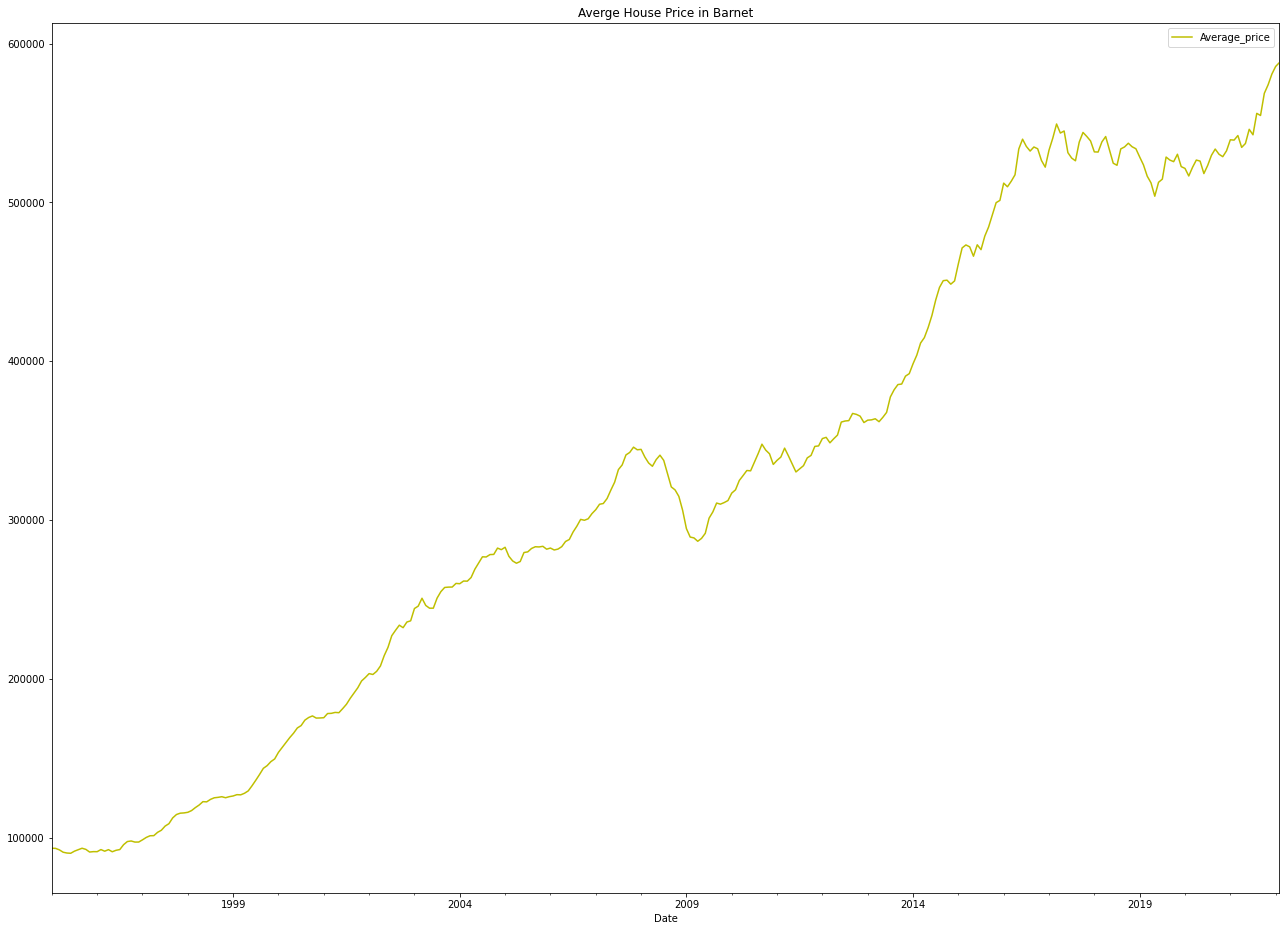

In [92]:
df_clean_Barnet.plot(kind='line', x='Date',y='Average_price' ,figsize = (22,16), color='y')
plt.title('Averge House Price in Barnet')
plt.show()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [ ]:
df_clean['Year'] = df_clean['Date'].dt.year
df_clean.head()



**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 


In [ ]:
AVP_df = pd.DataFrame(columns = ['London_Borough','average_price_1998','average_price_2018'])


In [ ]:
AVP_df['London_Borough'] = df_clean['London_Borough'].unique()
AVP_df.head()

In [ ]:
for i in range(0,32):
    AVP_df.iloc[i,1] = df_clean[(df_clean['London_Borough'] == AVP_df.iloc[i,0]) & \
                                            (df_clean['Year']==1998)]['Average_price'].mean()
    AVP_df.iloc[i,2] = df_clean[(df_clean['London_Borough'] == AVP_df.iloc[i,0]) & \
                                            (df_clean['Year']==2018)]['Average_price'].mean()
AVP_df.head()


In [ ]:
AVP_df['Price_ratio'] = AVP_df['average_price_2018']/AVP_df['average_price_1998']
AVP_df['Price_diff'] = AVP_df['average_price_2018'] - AVP_df['average_price_1998']
AVP_df

In [ ]:
AVP_df[AVP_df['Price_ratio'] == AVP_df['Price_ratio'].max()]


In [ ]:
AVP_df[AVP_df['Price_ratio'] == AVP_df['Price_ratio'].min()]

In [ ]:
AVP_df[AVP_df['Price_diff'] == AVP_df['Price_diff'].max()]

In [ ]:
AVP_df[AVP_df['Price_diff'] == AVP_df['Price_diff'].min()]

In [ ]:
AVP_df.plot(kind = 'bar', x = 'London_Borough', y = 'Price_ratio', figsize = (12,6), color='r')
plt.title('London Borough House Price ratio')
plt.show()

In [ ]:
AVP_df.plot(kind = 'bar', x = 'London_Borough', y = 'average_price_1998', figsize = (12,6), color='0')
plt.title('London Borough Average House Price in 1998')
plt.show()

In [ ]:
AVP_df.plot(kind = 'bar', x = 'London_Borough', y = 'average_price_2018', figsize = (12,6), color='g')
plt.title('London Borough Average House Price in 2018')
plt.show()

In [ ]:
AVP_df.plot(kind = 'bar', x = 'London_Borough', y = 'Price_diff', figsize = (12,6), color='r')
plt.title('London Borough Average House Price in 2018')
plt.show()

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

From the price ratio graph above we see that Hackney experienced highest percent increase among all London boroughs.
From the Price_diff graph we see that the Kensington and Chelsea experienced the greatest increase in overall price from 1998 to 2018, however it is not too surpising since Kensington and Chelsea already is a very expensive neighborhood (it has the highest price in 1998 as well as 2018) , so it is obvious that even a small percentage increase would result in very high overall price increase.

Hounslow experienced the minimum relative price increase.